In [1]:
 import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import random

import json 


import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

In [2]:
markers_uni = pd.read_csv('../results/benchmark/her2_final_without_A/uni_full_models/invasive_cancer_clustering/kmeans/uni/markers_uni.csv', index_col=0)
markers_uni_full_koleo_16384_prototypes = pd.read_csv('../results/benchmark/her2_final_without_A/uni_full_models/invasive_cancer_clustering/kmeans/uni_full_koleo_16384_prototypes/markers_uni_full_koleo_16384_prototypes.csv', index_col=0)

In [3]:
from matplotlib.colors import LinearSegmentedColormap

def pathway_plot_one_cluster(df, node_list, cluster, markers, col="avg_log2FC", default_value=0, color=True, k=0.8):
    df_nodes = markers.copy()
    df_nodes = df_nodes[df_nodes['cluster'] == cluster]
    df_nodes = df_nodes[df_nodes['gene'].isin(node_list)][[col, 'gene']]

    # add row in df_nodes if node in node_list is not in it. Put pval to 1.
    for node in node_list:
        if node not in df_nodes['gene'].tolist():
            df_nodes.loc[node] = [default_value, node]
            #df_nodes = df_nodes.append({'gene': node, 'pval': 1}, ignore_index=True)

    #df_nodes['log10_pval_adj'] = -np.log10(df_nodes['p_val_adj'])
    df_nodes.set_index('gene', inplace=True)



    # Initialize the graph
    G = nx.Graph()

    # Add nodes and edges from the Excel data
    for node in node_list:
        G.add_node(node, color=df_nodes.loc[node, col])
        
    for index, row in df.iterrows():
        G.add_edge(row['#node1'], row['node2'])
        
    
    # Draw the graph
    
    # Fix the seed for the layout
    seed = 42
    pos = nx.spring_layout(G, seed=seed, scale=2, k=k)

    if color:
        plt.figure(figsize=(10, 8))

        # Get node colors based on p-value, with a default value if 'p_value' is missing
        node_colors = [G.nodes[node]['color'] for node in G.nodes]

        # Create a color map
        # colors = ['#FFFFFF','#69C4E0',  '#242B7A',  '#CF48DB', '#ffe800']
        # cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
        colors = ['#FFFFFF',  '#69C4E0']
        cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
        
        cmap = plt.cm.Blues
        # Normalize the color map for the color bar
        norm = plt.Normalize(vmin=0, vmax=1.4)
        # normalized_colors = [norm(color) for color in node_colors]
        # Set edge color to red


        # Draw the graph
        # nx.draw(G, pos, node_color=node_colors, cmap=cmap, with_labels=False, node_size=500, edge_color='gray', width=0.5, vmin=0, vmax=50)
        g = nx.draw(G, pos, node_color=node_colors, cmap=cmap, 
                with_labels=False, node_size=500, edge_color='gray', width=0.5, vmin=0, vmax=1.4)
        # Add labels above the nodes
        for node, (x, y) in pos.items():
            plt.text(x, y + 0.1, s=str(node), horizontalalignment='center', fontsize=10, weight='bold', color='black')

        # Add a color bar
        # sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array(node_colors)
        cbar = plt.colorbar(sm)
        cbar.set_label(col, fontsize=12)
        
        ax = plt.gca()
        for node, (x, y) in pos.items():
            circle = plt.Circle((x, y), radius=0.05, edgecolor='black', facecolor='none', linewidth=5)
            ax.add_patch(circle)
            
        nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=cmap, node_size=500, vmin=0, vmax=1.4)
        nodes.set_edgecolor('black')
        
    else:
        # Draw the graph
        plt.figure(figsize=(8, 8))

        nx.draw(G, pos, with_labels=False, node_size=500, edge_color='gray', width=0.5)
        # Add labels above the nodes
        for node, (x, y) in pos.items():
            plt.text(x, y + 0.1, s=str(node), horizontalalignment='center', fontsize=10, weight='bold', color='black')
            
        nodes = nx.draw_networkx_nodes(G, pos, node_size=500, vmin=0, vmax=1.4, node_color='white')
        nodes.set_edgecolor('black')
    # Set edge color to red
    # Show the plot
    plt.tight_layout()

## Transforming growth factor beta -- cluster 2


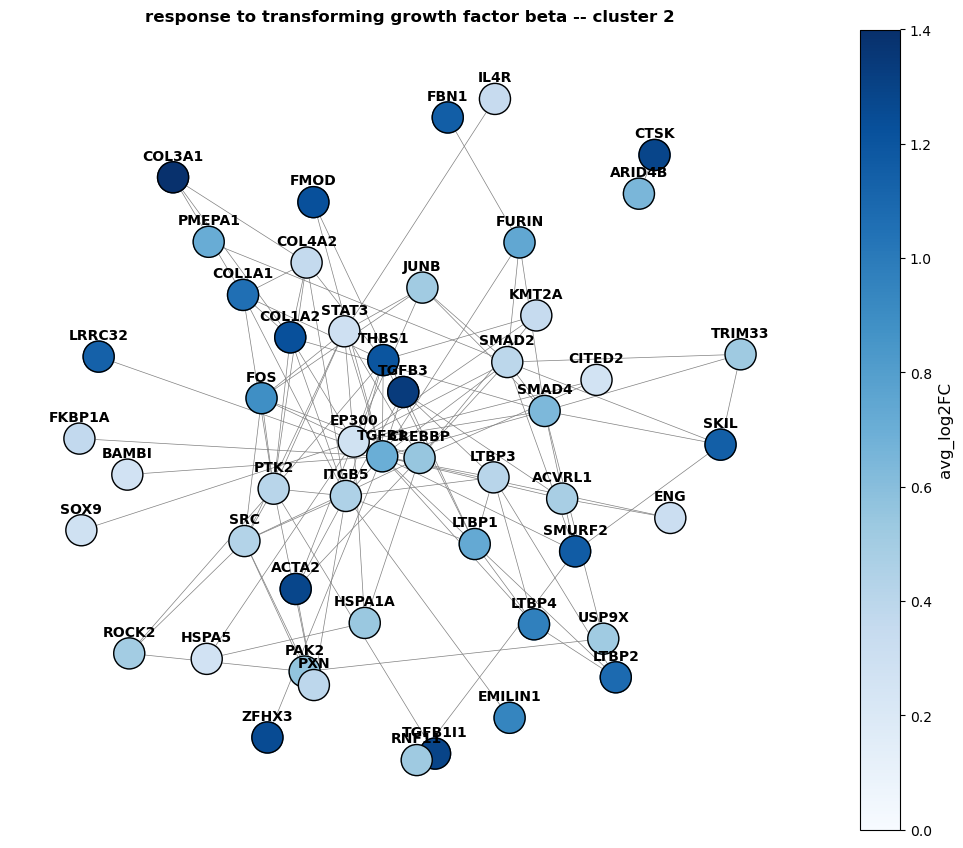

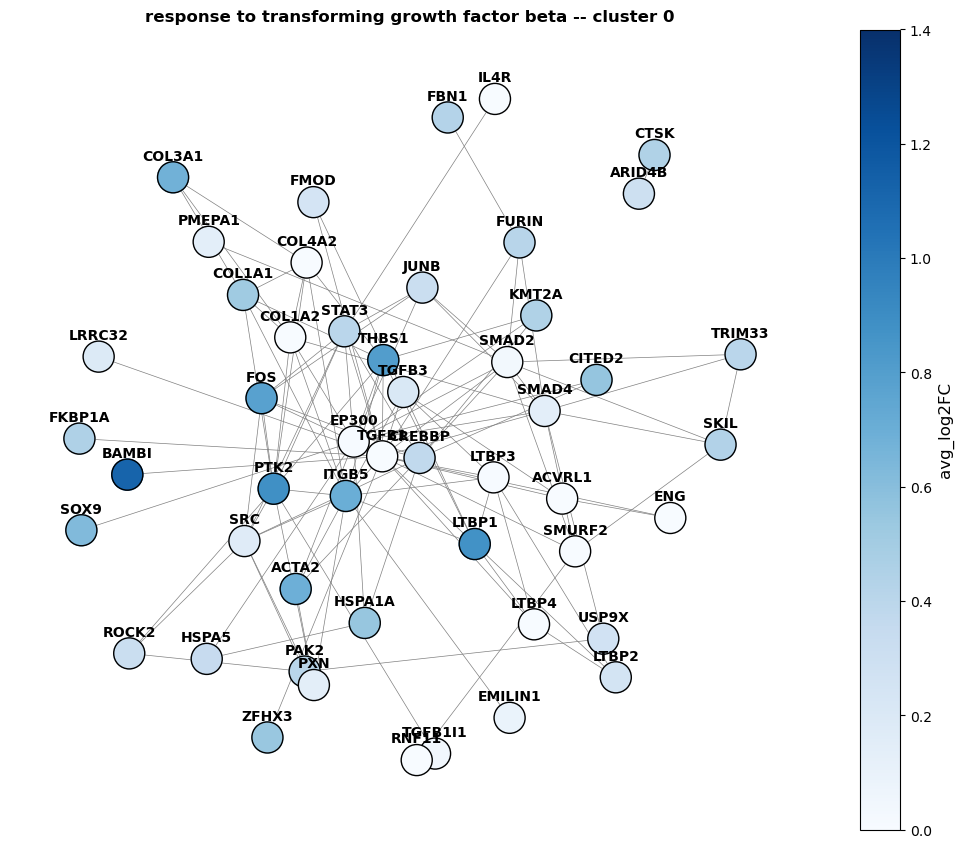

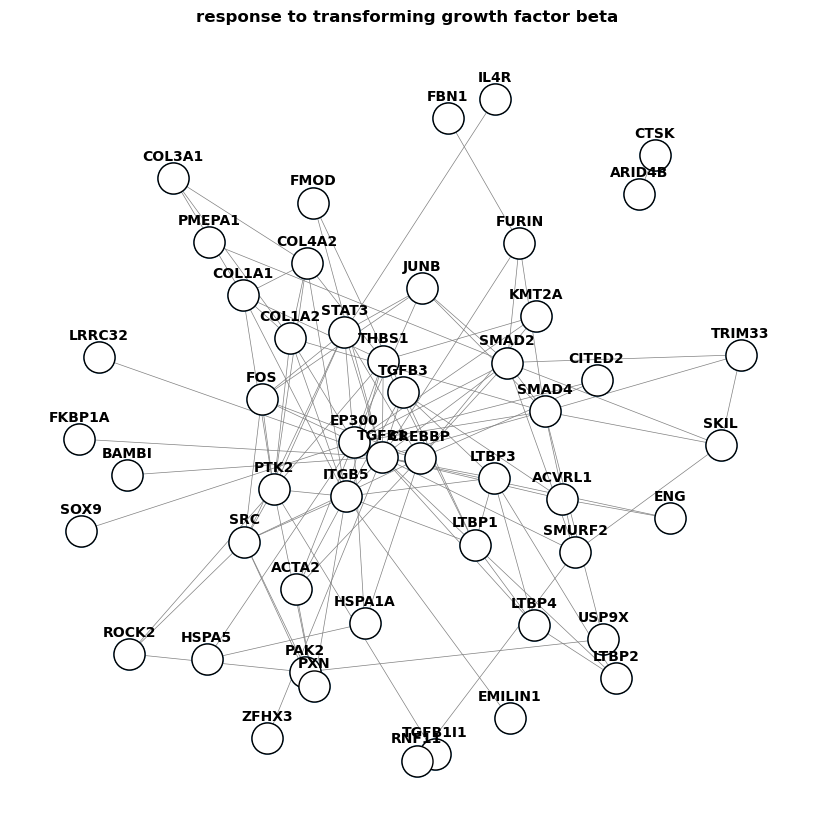

In [4]:
df = pd.read_csv('../results/benchmark/her2_final_without_A/uni_full_models/invasive_cancer_clustering/kmeans/uni_full_koleo_16384_prototypes/transforming_growth_factor_beta_cluster2.tsv', sep='\t')
node_list = list(set(df['#node1'].tolist() + df['node2'].tolist()))

pathway_plot_one_cluster(df, node_list, 2, markers_uni_full_koleo_16384_prototypes)
plt.title('response to transforming growth factor beta -- cluster 2', weight='bold')
plt.savefig('../Figures/Fig4/transforming_growth_factor_beta_cluster2_uni_full_koleo_16384_prototypes.pdf', bbox_inches='tight')

pathway_plot_one_cluster(df, node_list, 0, markers_uni_full_koleo_16384_prototypes)
plt.title('response to transforming growth factor beta -- cluster 0', weight='bold')
plt.savefig('../Figures/Fig4/transforming_growth_factor_beta_cluster0_uni_full_koleo_16384_prototypes.pdf', bbox_inches='tight')

pathway_plot_one_cluster(df, node_list, 0, markers_uni_full_koleo_16384_prototypes, color=False)
plt.title('response to transforming growth factor beta ', weight='bold')
plt.savefig('../Figures/Fig4/transforming_growth_factor_pathway.pdf', bbox_inches='tight')

## RNA localization

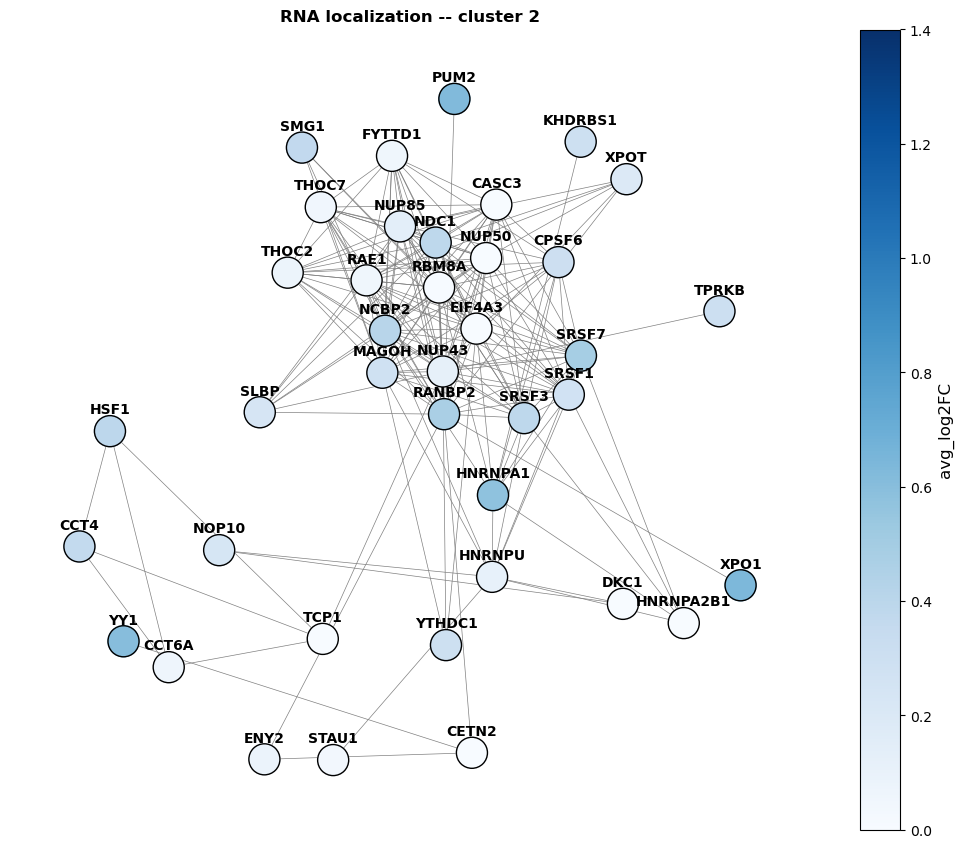

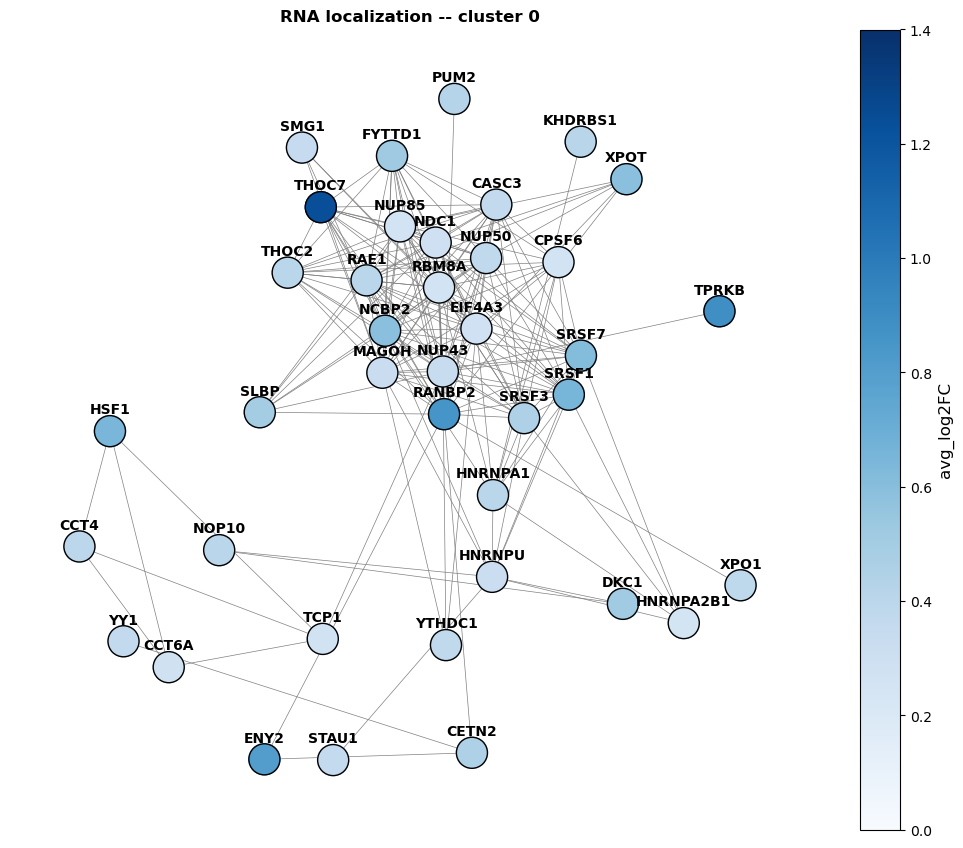

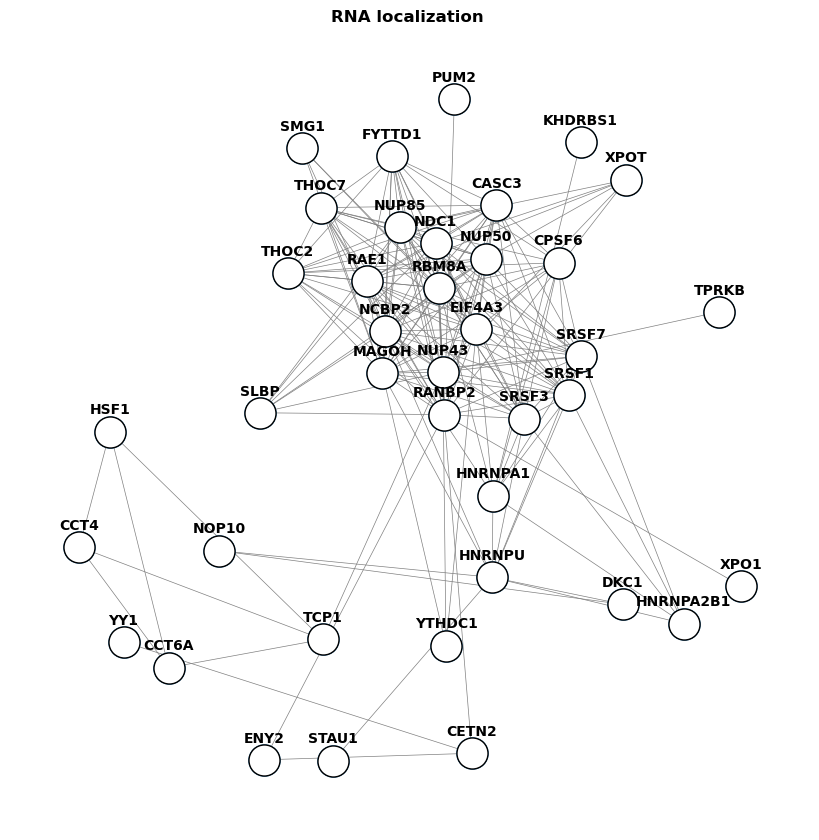

In [5]:
df = pd.read_csv('../results/benchmark/her2_final_without_A/uni_full_models/invasive_cancer_clustering/kmeans/uni_full_koleo_16384_prototypes/RNA_localization_cluster0.tsv', sep='\t')
node_list = list(set(df['#node1'].tolist() + df['node2'].tolist()))

pathway_plot_one_cluster(df, node_list, 2, markers_uni_full_koleo_16384_prototypes, k=1.2)
plt.title('RNA localization -- cluster 2', weight='bold')
plt.savefig('../Figures/Fig4/rna_localization_cluster2_uni_full_koleo_16384_prototypes.pdf', bbox_inches='tight')

pathway_plot_one_cluster(df, node_list, 0, markers_uni_full_koleo_16384_prototypes, k=1.2)
plt.title('RNA localization -- cluster 0', weight='bold')
plt.savefig('../Figures/Fig4/rna_localization_cluster0_uni_full_koleo_16384_prototypes.pdf', bbox_inches='tight')

pathway_plot_one_cluster(df, node_list, 0, markers_uni_full_koleo_16384_prototypes, color=False, k=1.2)
plt.title('RNA localization ', weight='bold')
plt.savefig('../Figures/Fig4/rna_localization_pathway.pdf', bbox_inches='tight')

## RNA splicing

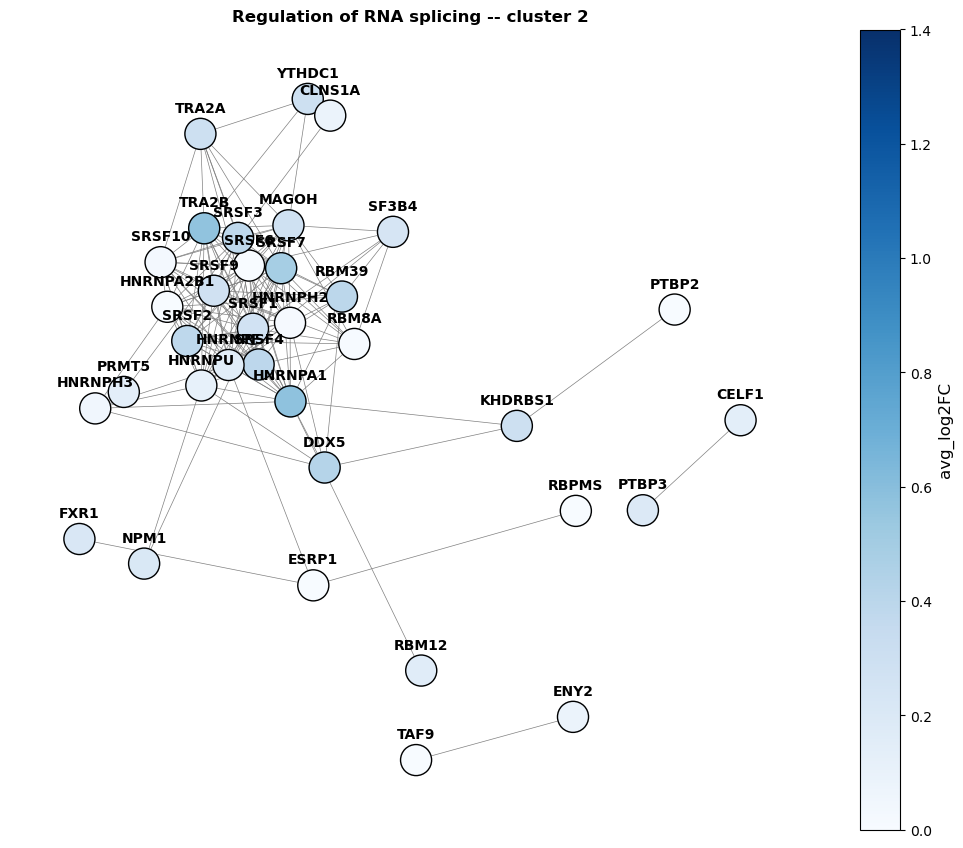

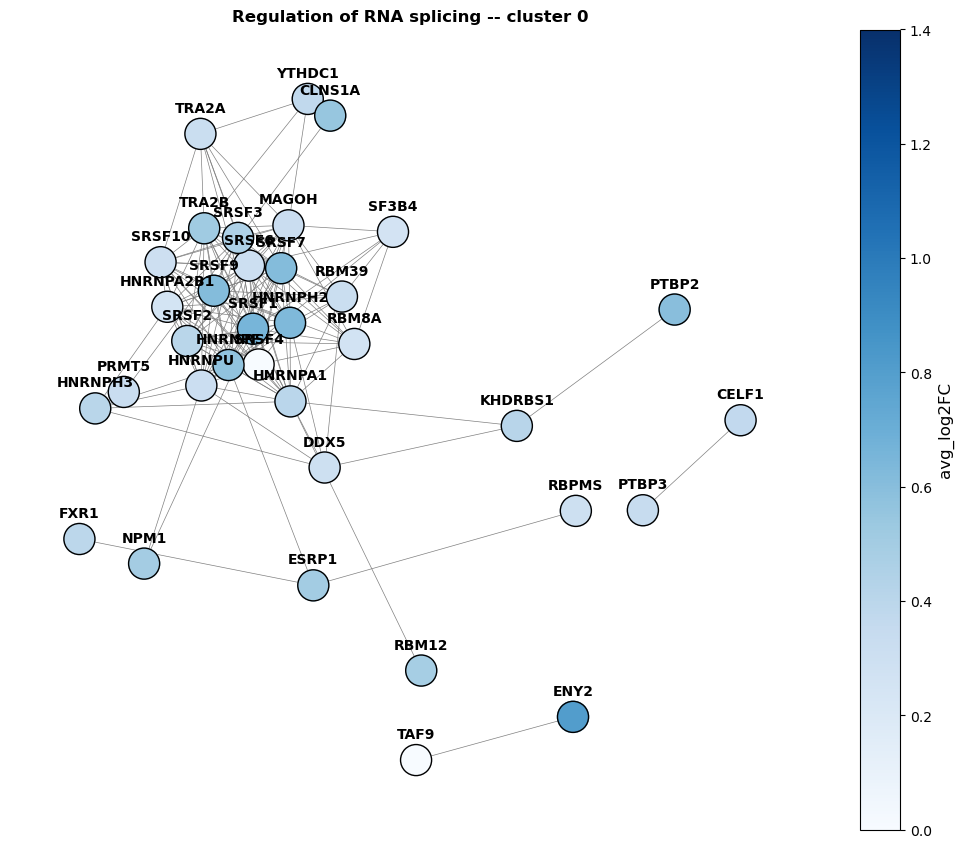

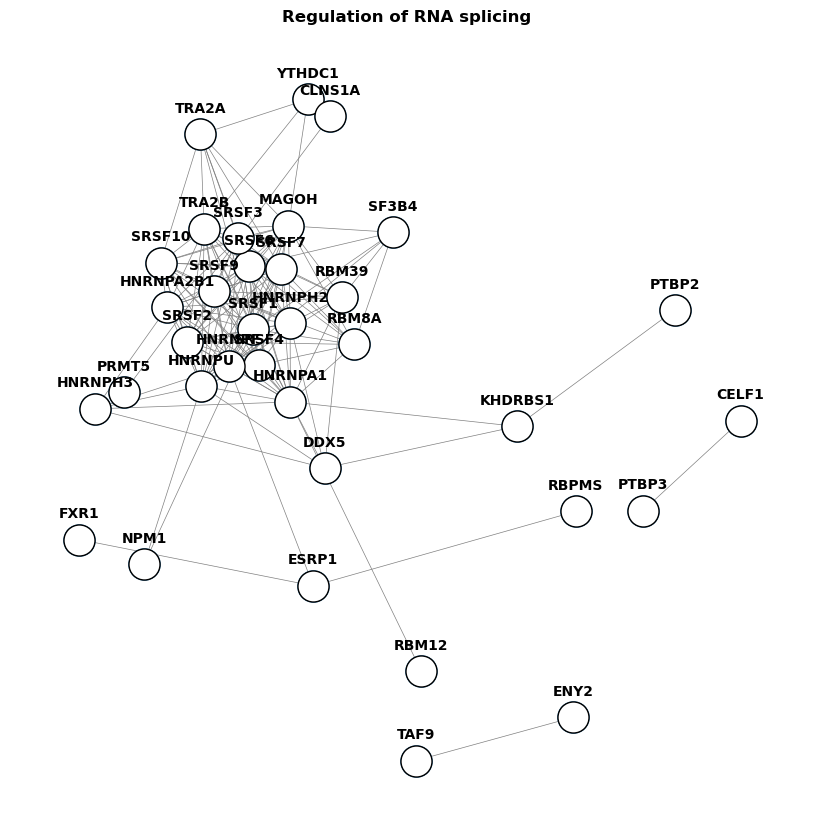

In [6]:
df = pd.read_csv('../results/benchmark/her2_final_without_A/uni_full_models/invasive_cancer_clustering/kmeans/uni_full_koleo_16384_prototypes/regulation_splicing_cluster0.tsv', sep='\t')
node_list = list(set(df['#node1'].tolist() + df['node2'].tolist()))

pathway_plot_one_cluster(df, node_list, 2, markers_uni_full_koleo_16384_prototypes)
plt.title('Regulation of RNA splicing -- cluster 2', weight='bold')
plt.savefig('../Figures/Fig4/rna_splicing_cluster2_uni_full_koleo_16384_prototypes.pdf', bbox_inches='tight')

pathway_plot_one_cluster(df, node_list, 0, markers_uni_full_koleo_16384_prototypes)
plt.title('Regulation of RNA splicing -- cluster 0', weight='bold')
plt.savefig('../Figures/Fig4/rna_splicing_cluster0_uni_full_koleo_16384_prototypes.pdf', bbox_inches='tight')

pathway_plot_one_cluster(df, node_list, 0, markers_uni_full_koleo_16384_prototypes, color=False)
plt.title('Regulation of RNA splicing ', weight='bold')
plt.savefig('../Figures/Fig4/rna_splicing_pathway.pdf', bbox_inches='tight')

## Negative regulation of apoptotic signaling pathway


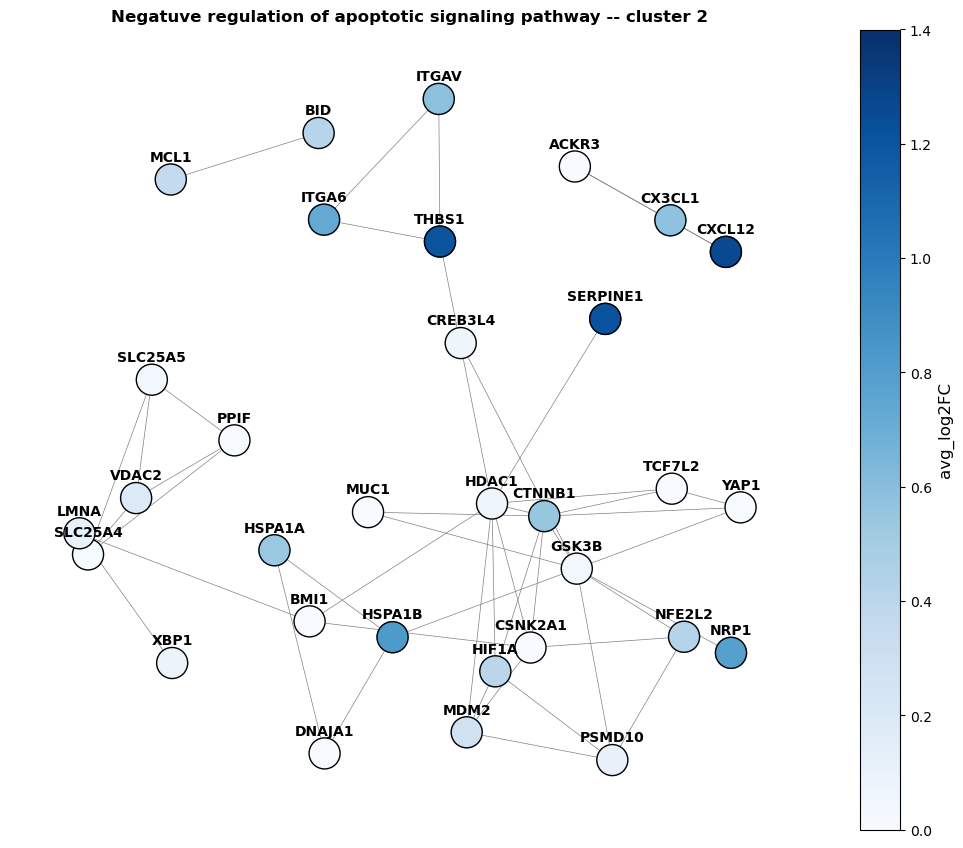

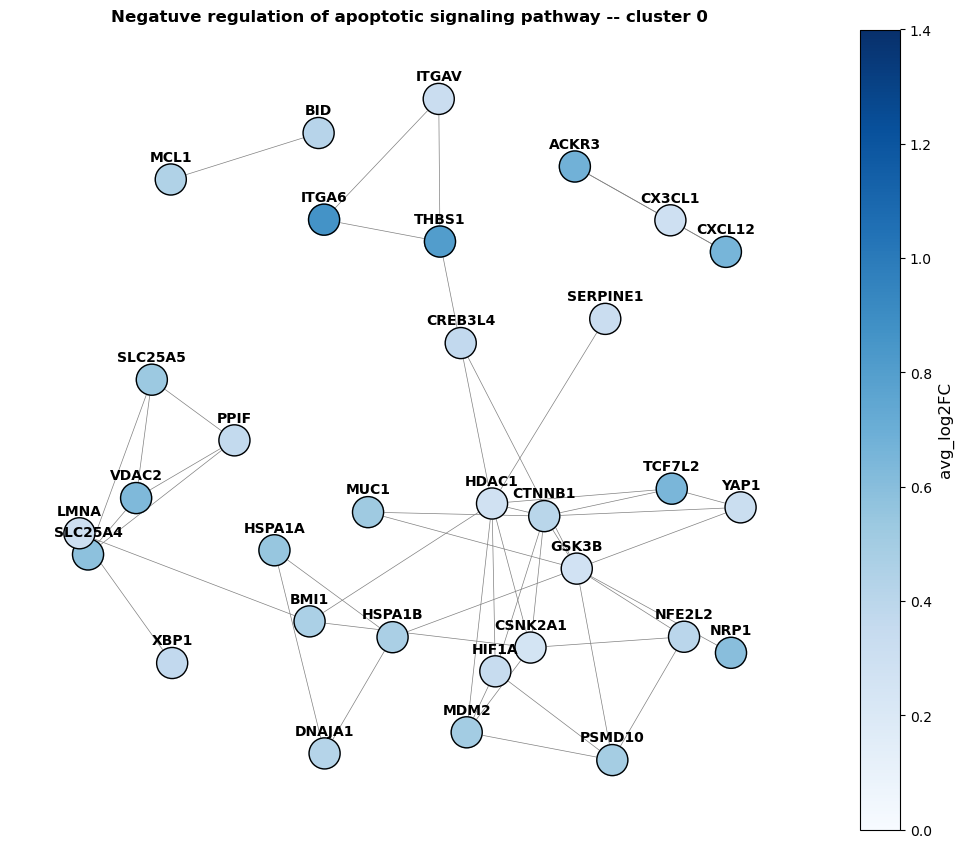

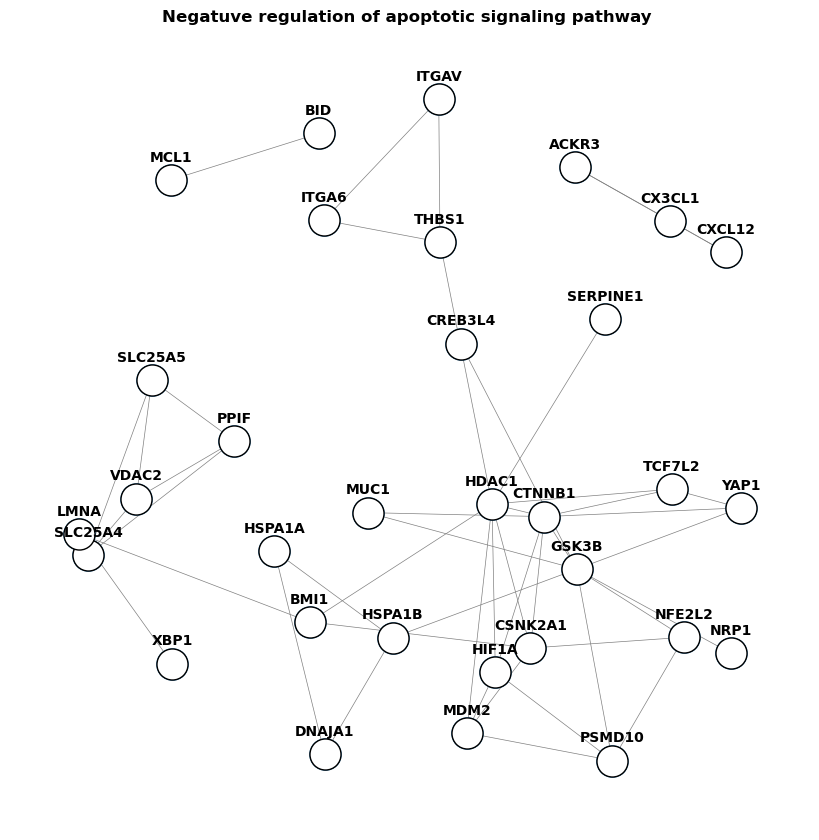

In [7]:
df = pd.read_csv('../results/benchmark/her2_final_without_A/uni_full_models/invasive_cancer_clustering/kmeans/uni_full_koleo_16384_prototypes/negative_regulation_of_apoptotic_signaling_pathway.tsv', sep='\t')
node_list = list(set(df['#node1'].tolist() + df['node2'].tolist()))

pathway_plot_one_cluster(df, node_list, 2, markers_uni_full_koleo_16384_prototypes)
plt.title('Negatuve regulation of apoptotic signaling pathway -- cluster 2', weight='bold')
plt.savefig('../Figures/Fig4/negative_regulation_of_apoptotic_signaling_pathway_cluster2_uni_full_koleo_16384_prototypes.pdf', bbox_inches='tight')

pathway_plot_one_cluster(df, node_list, 0, markers_uni_full_koleo_16384_prototypes)
plt.title('Negatuve regulation of apoptotic signaling pathway -- cluster 0', weight='bold')
plt.savefig('../Figures/Fig4/negative_regulation_of_apoptotic_signaling_pathway_cluster0_uni_full_koleo_16384_prototypes.pdf', bbox_inches='tight')

pathway_plot_one_cluster(df, node_list, 0, markers_uni_full_koleo_16384_prototypes, color=False)
plt.title('Negatuve regulation of apoptotic signaling pathway ', weight='bold')
plt.savefig('../Figures/Fig4/negative_regulation_of_apoptotic_signaling_pathway..pdf', bbox_inches='tight')